In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [2]:
# Load data
url = 'https://raw.githubusercontent.com/Cmgarces2/InterDataSets/main/EscenarioB/TimeBasedFeatures-10s-Layer2.csv'
df = pd.read_csv(url, low_memory=False)

In [3]:
# Normalize the data
scaler = MinMaxScaler()
data_to_process = df.iloc[:, 4:-1]
x_normalized = pd.DataFrame(scaler.fit_transform(data_to_process), columns=data_to_process.columns)

# Split into train and test sets

In [4]:
# Split into train and test sets
y = df['label']
label_map = {'AUDIO': 0, 'BROWSING': 1, 'CHAT': 2, 'FILE-TRANSFER': 3, 'MAIL': 4, 'P2P': 5, 'VIDEO': 6, 'VOIP': 7}
y_normalized = y.apply(lambda x: label_map[x] if x in label_map else -1)
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y_normalized, test_size=0.3, random_state=0)


In [5]:
# Define the MLP model
input_layer = Input(shape=(x_train.shape[1],))
hidden_layer = Dense(64, activation='relu')(input_layer)
hidden_layer = Dense(32, activation='relu')(hidden_layer)
hidden_layer = Dense(16, activation='relu')(hidden_layer)
output_layer = Dense(8, activation='softmax')(hidden_layer)

mlp = Model(inputs=input_layer, outputs=output_layer)

In [6]:
# Train the MLP model
mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = mlp.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test))


Epoch 1/50
352/352 [==============================] - 1s 2ms/step - loss: 1.7368 - accuracy: 0.3845 - val_loss: 1.4690 - val_accuracy: 0.4366
Epoch 2/50
352/352 [==============================] - 0s 949us/step - loss: 1.4433 - accuracy: 0.4464 - val_loss: 1.3885 - val_accuracy: 0.4557
Epoch 3/50
352/352 [==============================] - 0s 920us/step - loss: 1.3774 - accuracy: 0.4641 - val_loss: 1.3244 - val_accuracy: 0.4884
Epoch 4/50
352/352 [==============================] - 0s 952us/step - loss: 1.3072 - accuracy: 0.5012 - val_loss: 1.2799 - val_accuracy: 0.5141
Epoch 5/50
352/352 [==============================] - 0s 920us/step - loss: 1.2403 - accuracy: 0.5250 - val_loss: 1.1759 - val_accuracy: 0.5621
Epoch 6/50
352/352 [==============================] - 0s 912us/step - loss: 1.1752 - accuracy: 0.5876 - val_loss: 1.1166 - val_accuracy: 0.6392
Epoch 7/50
352/352 [==============================] - 0s 960us/step - loss: 1.1273 - accuracy: 0.6433 - val_loss: 1.0823 - val_accuracy: 0

In [7]:
# Evaluate the MLP model on the test set
y_pred = np.argmax(mlp.predict(x_test), axis=-1)

76/76 [==============================] - 0s 533us/step


In [8]:
# Print predicted labels
print(y_pred)


[6 5 5 ... 7 3 6]


In [9]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro')
print('METRICS FOR THE MODEL')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('F1-score:', f1)

METRICS FOR THE MODEL
Accuracy: 0.7058823529411765
Precision: 0.7922854935487884
F1-score: 0.5063652207313936


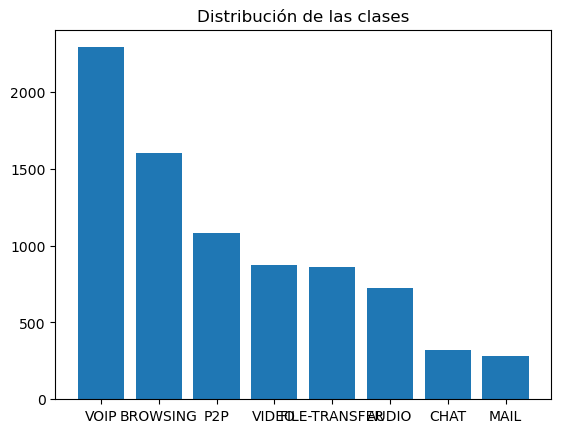

In [10]:
counts = y.value_counts()
plt.bar(counts.index, counts.values)
plt.title("Distribución de las clases")
plt.show()